<a href="https://colab.research.google.com/github/jon-chun/sentimentarcs/blob/main/ts_clustering_sharktank_20211118.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Clustering for Shark Tank Sentiment Arcs**

Jon Chun
18 Nov 2021

* https://github.com/wannesm/dtaidistance

# Connect gDrive and Navigate to Project Directory

In [1]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
%cd ./MyDrive/courses/senior_projects/fall2021/sa_sharktank/data

/gdrive/MyDrive/courses/senior_projects/fall2021/sa_sharktank/data


In [3]:
!ls *.csv

all33_chairs_clean.csv		  k9-masks_clean.csv
animated_lure_clean.csv		  katamco_-_toilet_timer_clean.csv
aura_bora_clean.csv		  liftid_clean.csv
bala_bangles_clean.csv		  mighty_carver_clean.csv
bee_d_vine_clean.csv		  moment_meditation_drinks_clean.csv
bootaybag_clean.csv		  odr_skis_clean.csv
brumachen_clean.csv		  pans_mushroom_jerky_clean.csv
buckle_me_baby_coats_clean.csv	  p-nuff_crunch_clean.csv
cereal_killerz_kitchen_clean.csv  pooch_paper_clean.csv
chirp_clean.csv			  prime_6_charcoal_clean.csv
electra_clean.csv		  quevos_clean.csv
fitfighter_clean.csv		  rumpl_clean.csv
flipstik_clean.csv		  sleep_pod_clean.csv
foam_party_hats_clean.csv	  sparkcharge_clean.csv
garmaguard_clean.csv		  surprise_cake_clean.csv
gooats_clean.csv		  swipensnap_clean.csv
his_and_her_bars_clean.csv	  touch_up_cup_clean.csv
holiballs_clean.csv		  trophysmack_clean.csv
jada_spices_clean.csv


# Install and Load Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
import random

In [6]:
!pip install dtaidistance[all]

     |████████████████████████████████| 1.1 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dtaidistance: filename=dtaidistance-2.3.2-cp37-cp37m-linux_x86_64.whl size=1586339 sha256=46fe4ee4e6f369e945de6b1c5b73bdc14df6933ba592b8ed619d76b225d48cde
  Stored in directory: /root/.cache/pip/wheels/5e/4a/9a/30f9efb3926e3c2f28231680685b36d0041466a33e4b8f8367
Successfully built dtaidistance


In [10]:
from IPython.display import Image

In [28]:
plt.rcParams['figure.figsize'] = (30, 15)

# Load data into DataFrame

In [11]:
!ls *.csv

all33_chairs_clean.csv		  k9-masks_clean.csv
animated_lure_clean.csv		  katamco_-_toilet_timer_clean.csv
aura_bora_clean.csv		  liftid_clean.csv
bala_bangles_clean.csv		  mighty_carver_clean.csv
bee_d_vine_clean.csv		  moment_meditation_drinks_clean.csv
bootaybag_clean.csv		  odr_skis_clean.csv
brumachen_clean.csv		  pans_mushroom_jerky_clean.csv
buckle_me_baby_coats_clean.csv	  p-nuff_crunch_clean.csv
cereal_killerz_kitchen_clean.csv  pooch_paper_clean.csv
chirp_clean.csv			  prime_6_charcoal_clean.csv
electra_clean.csv		  quevos_clean.csv
fitfighter_clean.csv		  rumpl_clean.csv
flipstik_clean.csv		  sleep_pod_clean.csv
foam_party_hats_clean.csv	  sparkcharge_clean.csv
garmaguard_clean.csv		  surprise_cake_clean.csv
gooats_clean.csv		  swipensnap_clean.csv
his_and_her_bars_clean.csv	  touch_up_cup_clean.csv
holiballs_clean.csv		  trophysmack_clean.csv
jada_spices_clean.csv


In [9]:
import os

# pitches_df = pd.DataFrame()

pitches_dt = {}
pitches_ls = []

for filename in os.listdir('./'):
  if filename.endswith(".csv"):
    filename_idx = filename.split('.')[0]
    filename_idx = filename_idx.split('_')[0]
    print(f'Reading: {filename}')
    temp_df = pd.read_csv(filename, index_col=0)
    # pitches_df[f'{filename_idx}_text_raw'] = temp_df['text']
    # pitches_df[f'{filename_idx}_roberta'] = temp_df['roberta15lg']
    pitches_ls.append(filename_idx)
    pitches_dt[filename_idx] = temp_df.copy(deep=True)
    # pitches_df[filename_idx] = temp_df.iloc[]
    # with open(filename, 'r') as fp:
    #   lines_ls = fp.readlines()
    #   pitches_df[filename_idx] = pd.Series(lines_ls)
  else:
    continue

Reading: cereal_killerz_kitchen_clean.csv
Reading: swipensnap_clean.csv
Reading: katamco_-_toilet_timer_clean.csv
Reading: gooats_clean.csv
Reading: trophysmack_clean.csv
Reading: p-nuff_crunch_clean.csv
Reading: brumachen_clean.csv
Reading: jada_spices_clean.csv
Reading: odr_skis_clean.csv
Reading: buckle_me_baby_coats_clean.csv
Reading: surprise_cake_clean.csv
Reading: k9-masks_clean.csv
Reading: pooch_paper_clean.csv
Reading: animated_lure_clean.csv
Reading: pans_mushroom_jerky_clean.csv
Reading: sleep_pod_clean.csv
Reading: quevos_clean.csv
Reading: chirp_clean.csv
Reading: bee_d_vine_clean.csv
Reading: moment_meditation_drinks_clean.csv
Reading: electra_clean.csv
Reading: all33_chairs_clean.csv
Reading: flipstik_clean.csv
Reading: prime_6_charcoal_clean.csv
Reading: bootaybag_clean.csv
Reading: mighty_carver_clean.csv
Reading: his_and_her_bars_clean.csv
Reading: foam_party_hats_clean.csv
Reading: holiballs_clean.csv
Reading: rumpl_clean.csv
Reading: liftid_clean.csv
Reading: touch

In [12]:
pitches_ls

['cereal',
 'swipensnap',
 'katamco',
 'gooats',
 'trophysmack',
 'p-nuff',
 'brumachen',
 'jada',
 'odr',
 'buckle',
 'surprise',
 'k9-masks',
 'pooch',
 'animated',
 'pans',
 'sleep',
 'quevos',
 'chirp',
 'bee',
 'moment',
 'electra',
 'all33',
 'flipstik',
 'prime',
 'bootaybag',
 'mighty',
 'his',
 'foam',
 'holiballs',
 'rumpl',
 'liftid',
 'touch',
 'garmaguard',
 'sparkcharge',
 'fitfighter',
 'bala',
 'aura']

In [13]:
pitches_dt['cereal']

,text,roberta15lg
0,"Chris: Hi, Sharks. We're your worst nightmares...",0.980079
1,Jess: And I'm stalking your morning cereal bow...,-0.989562
2,Jess: Hi! I'm Cereal Killer Jess. \n,0.997004
3,Chris: And I'm Cereal Killer Chris.\n,0.994537
4,"Jess: We're here from North Las Vegas, Nevada,...",-0.993321
...,...,...
81,"Chris: Yes, sir.\n",0.996546
82,Daymon: My biggest challenge with you is that ...,-0.999371
83,"Chris: Okay. Thank you, sir. Thank you. It's a...",0.998811
84,"Chris: ‐Good luck. ‐Good luck. ‐Good luck, guy...",0.998643


In [17]:
# Find the longest Pitch length

pitch_len_max = 0

for key, val in pitches_dt.items():
  apitch_len = val.shape[0]
  print(f'{key}: len: {apitch_len}')
  if apitch_len > pitch_len_max:
    pitch_len_max = apitch_len

print(f'\nMax Pitch Length: {pitch_len_max}')

cereal: len: 86
swipensnap: len: 124
katamco: len: 92
gooats: len: 129
trophysmack: len: 86
p-nuff: len: 122
brumachen: len: 98
jada: len: 112
odr: len: 89
buckle: len: 105
surprise: len: 100
k9-masks: len: 80
pooch: len: 91
animated: len: 102
pans: len: 125
sleep: len: 139
quevos: len: 144
chirp: len: 96
bee: len: 105
moment: len: 65
electra: len: 111
all33: len: 91
flipstik: len: 105
prime: len: 127
bootaybag: len: 195
mighty: len: 123
his: len: 117
foam: len: 135
holiballs: len: 118
rumpl: len: 138
liftid: len: 102
touch: len: 104
garmaguard: len: 78
sparkcharge: len: 97
fitfighter: len: 107
bala: len: 86
aura: len: 101

Max Pitch Length: 195


In [36]:
pitches_dt['foam']

,text,roberta15lg
0,"Manuel: Hi, Sharks. My name is Manuel Rojas.\n",0.994628
1,Grace: And I am Grace Rojas.\n,0.992047
2,"Manuel: And we're here asking for $100,000 for...",-0.993768
3,FPH: Foam Party Hats! -- Whoo! Whoo! \n,0.998355
4,"[ Whistle blowing, laughter ] Whoo!\n",0.998324
...,...,...
130,"Manuel: I ‐‐ I want to say, at this point, we'...",0.994355
131,Lubetzky: I have a vision.\n,0.996083
132,"Manuel: Sorry, I'm sorry. I really appreciate ...",0.998799
133,"Lori: Man, oh, my God. Thank you.\n",0.998284


In [44]:
pitches_dt['foam'].iloc[:,1]

0      0.994628
1      0.992047
2     -0.993768
3      0.998355
4      0.998324
         ...   
130    0.994355
131    0.996083
132    0.998799
133    0.998284
134   -0.965977
Name: roberta15lg, Length: 135, dtype: float64

In [41]:
np.linspace(0,,195)

array([0.        , 0.00515464, 0.01030928, 0.01546392, 0.02061856,
       0.0257732 , 0.03092784, 0.03608247, 0.04123711, 0.04639175,
       0.05154639, 0.05670103, 0.06185567, 0.06701031, 0.07216495,
       0.07731959, 0.08247423, 0.08762887, 0.09278351, 0.09793814,
       0.10309278, 0.10824742, 0.11340206, 0.1185567 , 0.12371134,
       0.12886598, 0.13402062, 0.13917526, 0.1443299 , 0.14948454,
       0.15463918, 0.15979381, 0.16494845, 0.17010309, 0.17525773,
       0.18041237, 0.18556701, 0.19072165, 0.19587629, 0.20103093,
       0.20618557, 0.21134021, 0.21649485, 0.22164948, 0.22680412,
       0.23195876, 0.2371134 , 0.24226804, 0.24742268, 0.25257732,
       0.25773196, 0.2628866 , 0.26804124, 0.27319588, 0.27835052,
       0.28350515, 0.28865979, 0.29381443, 0.29896907, 0.30412371,
       0.30927835, 0.31443299, 0.31958763, 0.32474227, 0.32989691,
       0.33505155, 0.34020619, 0.34536082, 0.35051546, 0.3556701 ,
       0.36082474, 0.36597938, 0.37113402, 0.37628866, 0.38144

In [ ]:
np.interp(np.linspace(0, 1, maxlength), 
                           np.linspace(0, 1, k), data)

In [47]:

x_interpol_ls

array([ 0.98007888,  0.1170917 , -0.74589548, -0.36492054,  0.50548211,
        0.99653311,  0.99545222,  0.86132971, -0.00963866, -0.88060703,
       -0.23475608,  0.63656801,  0.99598002,  0.99705357,  0.99705202,
        0.99461083,  0.99227992,  0.99452553,  0.99677114,  0.34901385,
       -0.5257286 , -0.59745796,  0.2779563 ,  0.99887867,  0.9988389 ,
        0.99879912,  0.99876897,  0.99873996,  0.99838397,  0.99782047,
        0.9972063 ,  0.99648896,  0.95467628,  0.08068285, -0.79331057,
       -0.32964802,  0.54560098,  0.57638763, -0.299078  , -0.82435772,
        0.05110619,  0.92657009,  0.19843579, -0.67361118, -0.43764533,
        0.43440195,  0.99863133,  0.99852788,  0.93688539,  0.06497869,
       -0.80692801, -0.99255489, -0.99380809, -0.99297434, -0.99010216,
       -0.79338878,  0.07666774,  0.94672427,  0.99811834,  0.99834602,
        0.42171117, -0.45365606, -0.66997188,  0.20526621,  0.99803394,
        0.9970245 ,  0.99601506,  0.99682972,  0.99806736,  0.53

In [48]:
# Create DataFrame of all Pitch sequences
# Pad the end of each Pitch to equal Max Pitch Length 

pitches_df = pd.DataFrame()

for key, val in pitches_dt.items():

  cols_roberta_ls = [x for x in val.columns if 'roberta' in x]
  pitch_len = val.shape[0]
  pad_len = pitch_len_max - pitch_len
  print(f'Pitch: {key}: len={pitch_len} + pad={pad_len}')

  # Pad the end of shorter series
  pitch_ls = val[cols_roberta_ls[0]].to_list() + [0]*pad_len

  # Expand to pitches_max_len and Interpolate values in created gaps
  apitch_len = val.shape[0]
  apitch_ls = val.iloc[:,1].to_list()

  # x_interpol_ls = np.interp(np.linspace(0, pitch_len_max, 1), val[:,1]).to_list()
  x_interpol_ls = np.interp(np.linspace(0, 1, pitch_len_max), np.linspace(0,1,apitch_len), apitch_ls)

  # pitches_df[col_name] = pd.Series(val[cols_roberta_ls[0]])
  col_name = f'{key}_{cols_roberta_ls[0]}'
  # pitches_df[col_name] = pd.Series(pitch_ls)
  pitches_df[col_name] = pd.Series(x_interpol_ls)

pitches_df.shape

Pitch: cereal: len=86 + pad=109
Pitch: swipensnap: len=124 + pad=71
Pitch: katamco: len=92 + pad=103
Pitch: gooats: len=129 + pad=66
Pitch: trophysmack: len=86 + pad=109
Pitch: p-nuff: len=122 + pad=73
Pitch: brumachen: len=98 + pad=97
Pitch: jada: len=112 + pad=83
Pitch: odr: len=89 + pad=106
Pitch: buckle: len=105 + pad=90
Pitch: surprise: len=100 + pad=95
Pitch: k9-masks: len=80 + pad=115
Pitch: pooch: len=91 + pad=104
Pitch: animated: len=102 + pad=93
Pitch: pans: len=125 + pad=70
Pitch: sleep: len=139 + pad=56
Pitch: quevos: len=144 + pad=51
Pitch: chirp: len=96 + pad=99
Pitch: bee: len=105 + pad=90
Pitch: moment: len=65 + pad=130
Pitch: electra: len=111 + pad=84
Pitch: all33: len=91 + pad=104
Pitch: flipstik: len=105 + pad=90
Pitch: prime: len=127 + pad=68
Pitch: bootaybag: len=195 + pad=0
Pitch: mighty: len=123 + pad=72
Pitch: his: len=117 + pad=78
Pitch: foam: len=135 + pad=60
Pitch: holiballs: len=118 + pad=77
Pitch: rumpl: len=138 + pad=57
Pitch: liftid: len=102 + pad=93
Pitc

(195, 37)

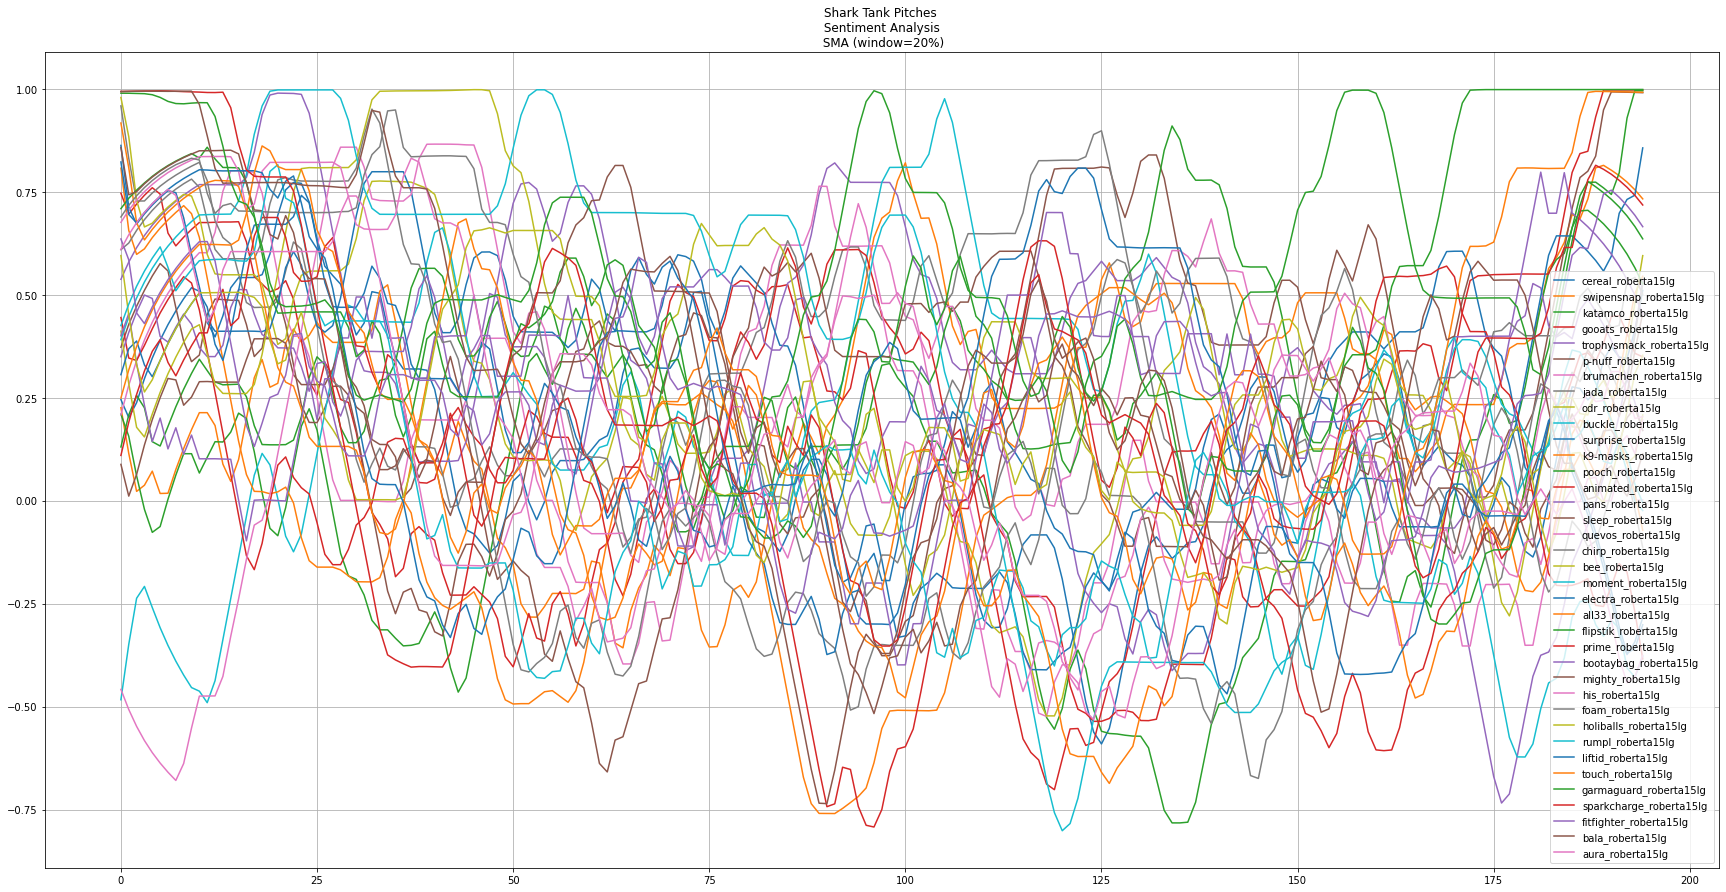

In [51]:
# plt.figure(figsize=(30,15))

win_size = 20
pitches_df.rolling(win_size, center=True, min_periods=0).mean().plot()

plt.grid(True)
plt.title(f'Shark Tank Pitches \n Sentiment Analysis \n SMA (window={win_size}%)')
plt.legend(loc='lower right')
plt.show();

# LOWESS Smoothing

* https://towardsdatascience.com/lowess-regression-in-python-how-to-discover-clear-patterns-in-your-data-f26e523d7a35

In [52]:
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization 

from sklearn.linear_model import LinearRegression # to build a LR model for comparison
import statsmodels.api as sm # to build a LOWESS model
from scipy.interpolate import interp1d # for interpolation of new data points

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [54]:
pitches_df.tail()

,cereal_roberta15lg,swipensnap_roberta15lg,katamco_roberta15lg,gooats_roberta15lg,trophysmack_roberta15lg,p-nuff_roberta15lg,brumachen_roberta15lg,jada_roberta15lg,odr_roberta15lg,buckle_roberta15lg,surprise_roberta15lg,k9-masks_roberta15lg,pooch_roberta15lg,animated_roberta15lg,pans_roberta15lg,sleep_roberta15lg,quevos_roberta15lg,chirp_roberta15lg,bee_roberta15lg,moment_roberta15lg,electra_roberta15lg,all33_roberta15lg,flipstik_roberta15lg,prime_roberta15lg,bootaybag_roberta15lg,mighty_roberta15lg,his_roberta15lg,foam_roberta15lg,holiballs_roberta15lg,rumpl_roberta15lg,liftid_roberta15lg,touch_roberta15lg,garmaguard_roberta15lg,sparkcharge_roberta15lg,fitfighter_roberta15lg,bala_roberta15lg,aura_roberta15lg
190,0.998769,0.998451,0.998630,0.994060,0.998558,0.998530,0.998750,0.998569,0.998698,0.709243,0.916304,0.998329,0.998667,0.833921,0.112951,0.998714,-0.890395,-0.917228,0.996902,0.360816,0.996842,-0.704943,0.997260,-0.994717,0.990631,0.031400,0.998466,0.996727,-0.996698,-0.646429,0.833997,0.980921,-0.173515,0.997059,0.996758,-0.993697,0.869846
191,0.998696,0.803549,0.998762,0.998737,0.998427,0.998544,0.998651,0.432120,0.998588,0.254445,0.998682,0.998282,0.998633,0.998596,-0.834694,0.998603,0.572448,0.059178,0.997267,0.998721,0.996797,0.218655,0.998695,-0.993407,-0.998978,-0.771288,0.637979,0.998603,-0.649439,0.761779,0.996764,0.986636,0.618240,0.987645,0.998588,-0.996430,0.090444
192,0.998588,-0.458531,0.998827,0.997666,0.998066,0.998131,0.998552,-0.711104,0.823461,-0.761195,0.998703,0.995577,0.998600,0.998562,0.442181,0.986946,0.994594,0.994488,0.998055,0.998707,0.998055,0.854477,0.998540,-0.997538,-0.998066,0.483896,-0.407368,0.998480,0.444491,0.997758,0.994345,0.997338,0.998704,0.958152,0.998377,-0.751311,-0.935000
193,0.998390,-0.263613,0.998442,0.997718,0.997122,0.997962,0.998564,-0.149675,-0.032287,-0.020327,0.021044,0.989699,0.998577,0.988908,0.278835,0.984271,0.997326,0.994854,0.996219,0.998693,0.996415,-0.071912,0.998639,-0.299071,0.978427,0.998460,-0.046880,0.390780,0.889603,0.410729,0.038925,0.998624,0.998725,-0.015061,0.998473,0.123768,-0.029926
194,0.998192,0.998403,0.998057,0.998826,0.996178,0.997954,0.998576,0.986817,-0.888036,0.993775,-0.997781,0.983821,0.998554,0.978427,-0.995538,0.998671,0.998086,0.995221,0.993974,0.998679,0.993878,-0.998302,0.998778,0.998673,-0.975372,0.998705,0.998500,-0.965977,0.997669,-0.999463,-0.998473,0.998668,0.998745,-0.988273,0.998631,0.998847,0.998371


In [ ]:
# lowess will return our "smoothed" data with a y value for at every x-value
lowess = sm.nonparametric.lowess(y, x, frac=.3)

# unpack the lowess smoothed points to their values
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

In [ ]:
pitches_df = pd.DataFrame()

for key, val in pitches_dt.items():
  # print(f'key: {key}: {val.columns}')
  cols_roberta_ls = [x for x in val.columns if 'roberta' in x]
  # print(f'  cols_roberta_ls: {cols_roberta_ls}')
  # print(f'  {val[cols_roberta_ls[0]]}')
  col_name = f'{key}_{cols_roberta_ls[0]}'
  pitches_df[col_name] = pd.Series(val[cols_roberta_ls[0]])

pitches_df.head()

,cereal_roberta15lg,swipensnap_roberta15lg,katamco_roberta15lg,gooats_roberta15lg,trophysmack_roberta15lg,p-nuff_roberta15lg,brumachen_roberta15lg,jada_roberta15lg,odr_roberta15lg,buckle_roberta15lg,surprise_roberta15lg,k9-masks_roberta15lg,pooch_roberta15lg,animated_roberta15lg,pans_roberta15lg,sleep_roberta15lg,quevos_roberta15lg,chirp_roberta15lg,bee_roberta15lg,moment_roberta15lg,electra_roberta15lg,all33_roberta15lg,flipstik_roberta15lg,prime_roberta15lg,bootaybag_roberta15lg,mighty_roberta15lg,his_roberta15lg,foam_roberta15lg,holiballs_roberta15lg,rumpl_roberta15lg,liftid_roberta15lg,touch_roberta15lg,garmaguard_roberta15lg,sparkcharge_roberta15lg,fitfighter_roberta15lg,bala_roberta15lg,aura_roberta15lg
0,0.980079,0.997337,-0.999252,0.994889,0.998614,-0.997464,0.998631,0.998694,0.998571,0.998042,0.997642,0.995867,0.991767,0.997436,0.998845,0.982998,0.995097,0.994883,0.998573,0.980268,0.996140,0.732724,-0.966206,0.995141,0.996731,0.994121,0.995131,0.994628,0.994972,0.958047,0.995039,0.995480,0.983825,0.997926,0.992338,0.992433,0.995520
1,-0.989562,0.998521,0.998406,0.978427,0.995983,0.978427,-0.998393,0.978427,0.998170,-0.996687,0.997286,0.986578,-0.997092,0.994617,0.998790,0.998101,0.990517,0.993736,0.998703,0.994814,0.998465,0.993794,0.996146,-0.991013,0.997451,0.988823,0.992900,0.992047,0.992473,0.978427,0.991889,0.998266,0.978427,0.978427,0.996492,0.994304,-0.999074
2,0.997004,0.998629,-0.999244,0.998848,0.998395,0.998495,0.996772,0.994558,0.998442,-0.998744,0.995138,0.985577,-0.999268,0.998570,-0.995835,0.995980,-0.991446,0.996333,0.998414,-0.990097,-0.999223,0.996638,0.998747,0.998904,-0.982884,0.986358,0.998644,-0.993768,0.992221,0.998826,0.993727,0.988784,0.997080,0.996613,0.998836,0.987789,0.998858
3,0.994537,-0.986138,0.990302,0.978427,-0.999469,0.992774,-0.952735,0.987082,0.984970,-0.998312,0.997563,0.997867,0.950840,0.997871,0.995103,0.998642,-0.803525,0.997738,0.977700,0.998891,-0.998780,0.995535,0.991566,-0.995880,0.996493,0.998908,0.998588,0.998355,0.998452,0.993760,0.997887,-0.999363,0.997451,0.997399,0.997015,0.996827,0.998811
4,-0.993321,-0.993586,0.998422,0.997451,0.998716,0.995275,0.998763,0.984507,0.998887,-0.996878,0.998849,-0.999325,0.998384,-0.997857,0.991946,-0.988657,-0.991725,-0.996064,-0.947246,0.997480,0.998799,0.989402,0.998635,-0.999448,0.998881,0.996953,-0.983447,0.998324,-0.985546,0.993895,0.978867,-0.983784,0.987998,0.998445,-0.994082,0.997912,0.995613


In [ ]:
pitches_df.tail()

,cereal_roberta15lg,swipensnap_roberta15lg,katamco_roberta15lg,gooats_roberta15lg,trophysmack_roberta15lg,p-nuff_roberta15lg,brumachen_roberta15lg,jada_roberta15lg,odr_roberta15lg,buckle_roberta15lg,surprise_roberta15lg,k9-masks_roberta15lg,pooch_roberta15lg,animated_roberta15lg,pans_roberta15lg,sleep_roberta15lg,quevos_roberta15lg,chirp_roberta15lg,bee_roberta15lg,moment_roberta15lg,electra_roberta15lg,all33_roberta15lg,flipstik_roberta15lg,prime_roberta15lg,bootaybag_roberta15lg,mighty_roberta15lg,his_roberta15lg,foam_roberta15lg,holiballs_roberta15lg,rumpl_roberta15lg,liftid_roberta15lg,touch_roberta15lg,garmaguard_roberta15lg,sparkcharge_roberta15lg,fitfighter_roberta15lg,bala_roberta15lg,aura_roberta15lg
81,0.996546,0.998825,0.998339,-0.997976,-0.994441,0.995378,-0.999024,-0.999496,0.998274,-0.995507,0.975919,NaN,0.998528,-0.982656,-0.998686,0.997648,0.998687,-0.993845,0.989840,NaN,-0.995041,-0.999492,0.989557,0.998459,0.988306,0.998369,0.732454,-0.977988,-0.998346,0.996182,-0.999514,-0.998871,NaN,0.997451,0.998739,0.998689,0.937858
82,-0.999371,0.998593,-0.999104,-0.992399,0.968345,0.997451,-0.998221,0.978427,0.998529,-0.983135,0.998608,NaN,0.998804,-0.913889,-0.994528,-0.999378,-0.999490,0.988359,0.995736,NaN,0.995117,0.996752,0.993840,0.994901,0.997451,-0.990325,-0.999484,-0.985609,0.991783,-0.995777,-0.983041,-0.987932,NaN,0.997924,-0.988890,0.994468,0.986645
83,0.998811,0.988419,0.998620,-0.990918,0.998632,0.997451,-0.998617,-0.999412,-0.998894,-0.982468,0.998637,NaN,0.998641,-0.997374,-0.999477,0.998607,0.998575,0.995853,0.989522,NaN,-0.997738,-0.999209,0.986744,0.998475,0.997451,-0.998728,0.996433,0.998200,-0.990241,0.976591,0.997252,-0.983242,NaN,0.998388,-0.998612,-0.992153,-0.999427
84,0.998643,0.998593,0.987306,-0.988851,0.998332,0.994187,0.981354,0.978427,-0.998536,-0.998894,-0.999298,NaN,0.996422,0.989105,-0.998423,0.997727,0.996816,0.986165,0.992605,NaN,-0.992737,0.998477,0.998815,-0.993147,-0.986982,0.996259,-0.998241,0.996536,0.990442,0.986148,0.988717,-0.987098,NaN,0.990699,-0.999489,-0.998392,0.987359
85,0.998192,0.996798,0.998616,-0.993439,0.996178,-0.990322,-0.987664,0.994670,0.998543,0.996166,0.998626,NaN,0.998673,-0.999420,-0.997556,-0.998699,0.998887,-0.983814,0.997912,NaN,-0.960452,0.996933,0.996944,-0.994221,-0.998224,-0.998993,-0.997148,0.997307,-0.998828,0.990871,-0.998731,-0.997741,NaN,-0.997911,-0.979807,0.998847,-0.997667


In [ ]:
for i, apitch in enumerate(pitches_ls):
  print(f'Pitch #{i}: {apitch}')

Pitch #0: cereal
Pitch #1: swipensnap
Pitch #2: katamco
Pitch #3: gooats
Pitch #4: trophysmack
Pitch #5: p-nuff
Pitch #6: brumachen
Pitch #7: jada
Pitch #8: odr
Pitch #9: buckle
Pitch #10: surprise
Pitch #11: k9-masks
Pitch #12: pooch
Pitch #13: animated
Pitch #14: pans
Pitch #15: sleep
Pitch #16: quevos
Pitch #17: chirp
Pitch #18: bee
Pitch #19: moment
Pitch #20: electra
Pitch #21: all33
Pitch #22: flipstik
Pitch #23: prime
Pitch #24: bootaybag
Pitch #25: mighty
Pitch #26: his
Pitch #27: foam
Pitch #28: holiballs
Pitch #29: rumpl
Pitch #30: liftid
Pitch #31: touch
Pitch #32: garmaguard
Pitch #33: sparkcharge
Pitch #34: fitfighter
Pitch #35: bala
Pitch #36: aura


In [ ]:
pitch_roberta_cols = [x for x in pitches_df.columns if x.endswith('_roberta')]

NameError: ignored

In [ ]:
pitches_df[pitch_roberta_cols]

NameError: ignored

In [ ]:
pitches_df['text_raw'] = pitches_df['text_raw'].astype('string')

In [ ]:
import texthero as hero

In [ ]:
pitches_df['text_clean'] = hero.clean(pitches_df['text_raw'])

In [ ]:
pitches_df.head()

,text_raw,cereal_roberta,swipensnap_roberta,katamco_roberta,gooats_roberta,trophysmack_roberta,p-nuff_roberta,brumachen_roberta,jada_roberta,odr_roberta,buckle_roberta,surprise_roberta,k9-masks_roberta,pooch_roberta,animated_roberta,pans_roberta,sleep_roberta,quevos_roberta,chirp_roberta,bee_roberta,moment_roberta,electra_roberta,all33_roberta,flipstik_roberta,prime_roberta,bootaybag_roberta,mighty_roberta,his_roberta,foam_roberta,holiballs_roberta,rumpl_roberta,liftid_roberta,touch_roberta,garmaguard_roberta,sparkcharge_roberta,fitfighter_roberta,bala_roberta,aura_roberta,text_clean
0,"Maddie: How's it going, Sharks? My name is Mad...",0.980079,0.997337,-0.999252,0.994889,0.998614,-0.997464,0.998631,0.998694,0.998571,0.998042,0.997642,0.995867,0.991767,0.997436,0.998845,0.982998,0.995097,0.994883,0.998573,0.980268,0.996140,0.732724,-0.966206,0.995141,0.996731,0.994121,0.995131,0.994628,0.994972,0.958047,0.995039,0.995480,0.983825,0.997926,0.992338,0.992433,0.995520,maddie going sharks name maddie
1,"Paul: And I'm Paul. We're seeking $150,000 for...",-0.989562,0.998521,0.998406,0.978427,0.995983,0.978427,-0.998393,0.978427,0.998170,-0.996687,0.997286,0.986578,-0.997092,0.994617,0.998790,0.998101,0.990517,0.993736,0.998703,0.994814,0.998465,0.993794,0.996146,-0.991013,0.997451,0.988823,0.992900,0.992047,0.992473,0.978427,0.991889,0.998266,0.978427,0.978427,0.996492,0.994304,-0.999074,paul paul seeking fizz-ness know sparkling wat...
2,Maddie: Aura Bora is a line of herbal sparklin...,0.997004,0.998629,-0.999244,0.998848,0.998395,0.998495,0.996772,0.994558,0.998442,-0.998744,0.995138,0.985577,-0.999268,0.998570,-0.995835,0.995980,-0.991446,0.996333,0.998414,-0.990097,-0.999223,0.996638,0.998747,0.998904,-0.982884,0.986358,0.998644,-0.993768,0.992221,0.998826,0.993727,0.988784,0.997080,0.996613,0.998836,0.987789,0.998858,maddie aura bora line herbal sparkling waters ...
3,Paul: ‐ ‐Come meet our five heavenly varieties...,0.994537,-0.986138,0.990302,0.978427,-0.999469,0.992774,-0.952735,0.987082,0.984970,-0.998312,0.997563,0.997867,0.950840,0.997871,0.995103,0.998642,-0.803525,0.997738,0.977700,0.998891,-0.998780,0.995535,0.991566,-0.995880,0.996493,0.998908,0.998588,0.998355,0.998452,0.993760,0.997887,-0.999363,0.997451,0.997399,0.997015,0.996827,0.998811,paul - -come meet five heavenly varieties -- l...
4,Maddie: We can't wait for you to dive into tho...,-0.993321,-0.993586,0.998422,0.997451,0.998716,0.995275,0.998763,0.984507,0.998887,-0.996878,0.998849,-0.999325,0.998384,-0.997857,0.991946,-0.988657,-0.991725,-0.996064,-0.947246,0.997480,0.998799,0.989402,0.998635,-0.999448,0.998881,0.996953,-0.983447,0.998324,-0.985546,0.993895,0.978867,-0.983784,0.987998,0.998445,-0.994082,0.997912,0.995613,maddie wait dive samples front sharks... water...


# Test dtaidistance Functionality

* https://github.com/wannesm/dtaidistance

In [ ]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [ ]:
s1 = np.array([0., 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0])
s2 = np.array([0., 1, 2, 3, 1, 0, 0, 0, 2, 1, 0, 0, 0])

path = dtw.warping_path(s1, s2)

dtwvis.plot_warping(s1, s2, path, filename="warp.png")

(None, None)

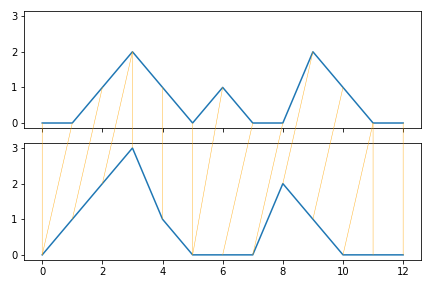

In [ ]:
Image('warp.png')

In [ ]:
%%time

s1 = [0, 0, 1, 2, 1, 0, 1, 0, 0]
s2 = [0, 1, 2, 0, 0, 0, 0, 0, 0]

d = dtw.distance(s1, s2)
print(f'The distance via Python is: {d}')

The distance via Python is: 1.4142135623730951
CPU times: user 434 µs, sys: 0 ns, total: 434 µs
Wall time: 442 µs


In [ ]:
%%time

# 30-300x faster using c directly

from dtaidistance import dtw
import array

s1 = array.array('d',[0, 0, 1, 2, 1, 0, 1, 0, 0])
s2 = array.array('d',[0, 1, 2, 0, 0, 0, 0, 0, 0])

d = dtw.distance_fast(s1, s2, use_pruning=True)
print(f'The distance via c-code is: {d}')

The distance via c-code is: 1.4142135623730951
CPU times: user 991 µs, sys: 1.04 ms, total: 2.03 ms
Wall time: 5.76 ms


In [ ]:
%%time

# ?x faster using numpy

s1 = np.array([0, 0, 1, 2, 1, 0, 1, 0, 0], dtype=np.double)
s2 = np.array([0.0, 1, 2, 0, 0, 0, 0, 0, 0])

d = dtw.distance_fast(s1, s2, use_pruning=True)
print(f'The distance via numpy is: {d}')

The distance via numpy is: 1.4142135623730951
CPU times: user 309 µs, sys: 0 ns, total: 309 µs
Wall time: 317 µs


In [ ]:
# show args

print(dtw.distance.__doc__)


    Dynamic Time Warping.

    This function keeps a compact matrix, not the full warping paths matrix.

    Uses dynamic programming to compute:

    wps[i, j] = (s1[i]-s2[j])**2 + min(
                    wps[i-1, j  ] + penalty,  // vertical   / insertion / expansion
                    wps[i  , j-1] + penalty,  // horizontal / deletion  / compression
                    wps[i-1, j-1])            // diagonal   / match
    dtw = sqrt(wps[-1, -1])

    :param s1: First sequence
    :param s2: Second sequence
    :param window: Only allow for maximal shifts from the two diagonals smaller than this number.
        It includes the diagonal, meaning that an Euclidean distance is obtained by setting window=1.
    :param max_dist: Stop if the returned values will be larger than this value
    :param max_step: Do not allow steps larger than this value
    :param max_length_diff: Return infinity if length of two series is larger
    :param penalty: Penalty to add if compression or expansion 

In [ ]:
s1 = [0, 0, 1, 2, 1, 0, 1, 0, 0]
s2 = [0, 1, 2, 0, 0, 0, 0, 0, 0]
distance, paths = dtw.warping_paths(s1, s2)
print(distance)
print(paths)

1.4142135623730951
[[0.                inf        inf        inf        inf        inf
         inf        inf        inf        inf]
 [       inf 0.         1.         2.23606798 2.23606798 2.23606798
  2.23606798 2.23606798 2.23606798 2.23606798]
 [       inf 0.         1.         2.23606798 2.23606798 2.23606798
  2.23606798 2.23606798 2.23606798 2.23606798]
 [       inf 1.         0.         1.         1.41421356 1.73205081
  2.         2.23606798 2.44948974 2.44948974]
 [       inf 2.23606798 1.         0.         2.         2.44948974
  2.64575131 2.82842712 3.         3.16227766]
 [       inf 2.44948974 1.         1.         1.         1.41421356
  1.73205081 2.         2.23606798 2.44948974]
 [       inf 2.44948974 1.41421356 2.23606798 1.         1.
  1.         1.         1.         1.        ]
 [       inf 2.64575131 1.41421356 1.73205081 1.41421356 1.41421356
  1.41421356 1.41421356 1.41421356 1.41421356]
 [       inf 2.64575131 1.73205081 2.44948974 1.41421356 1.41421356
 

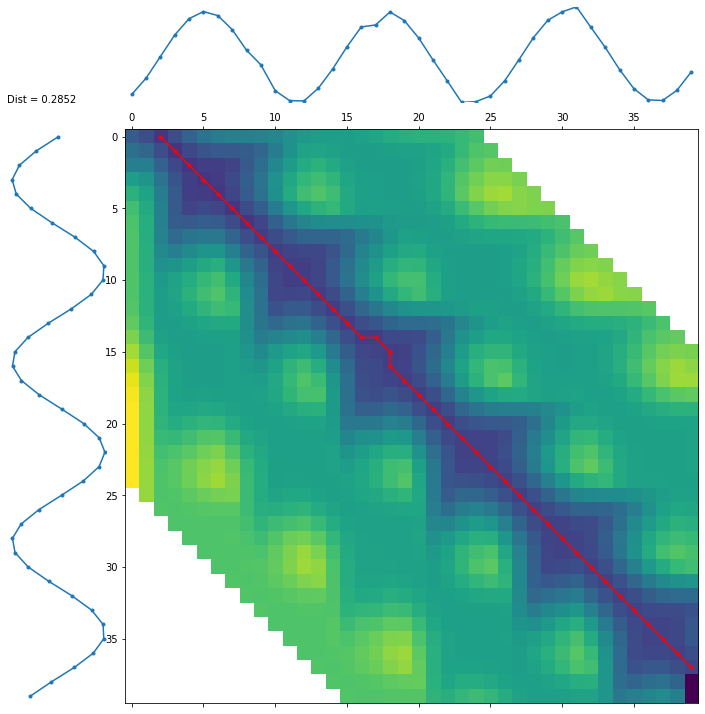

In [ ]:
x = np.arange(0, 20, .5)
s1 = np.sin(x)
s2 = np.sin(x - 1)
random.seed(1)
for idx in range(len(s2)):
    if random.random() < 0.05:
        s2[idx] += (random.random() - 0.5) / 2
d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path);

In [ ]:
series = [
    np.array([0, 0, 1, 2, 1, 0, 1, 0, 0], dtype=np.double),
    np.array([0.0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0]),
    np.array([0.0, 0, 1, 2, 1, 0, 0, 0])]
ds = dtw.distance_matrix_fast(series)

In [ ]:
series = np.matrix([
    [0.0, 0, 1, 2, 1, 0, 1, 0, 0],
    [0.0, 1, 2, 0, 0, 0, 0, 0, 0],
    [0.0, 0, 1, 2, 1, 0, 0, 0, 0]])
ds = dtw.distance_matrix_fast(series)

In [ ]:
ds

array([[0.        , 1.41421356, 1.        ],
       [1.41421356, 0.        , 1.        ],
       [1.        , 1.        , 0.        ]])

## Clustering

In [ ]:
series = np.matrix([
     [0., 0, 1, 2, 1, 0, 1, 0, 0],
     [0., 1, 2, 0, 0, 0, 0, 0, 0],
     [1., 2, 0, 0, 0, 0, 0, 1, 1],
     [0., 0, 1, 2, 1, 0, 1, 0, 0],
     [0., 1, 2, 0, 0, 0, 0, 0, 0],
     [1., 2, 0, 0, 0, 0, 0, 1, 1]])
ds = dtw.distance_matrix_fast(series, block=((1, 4), (3, 5)))

In [ ]:
from dtaidistance import clustering

# Custom Hierarchical clustering
model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
cluster_idx = model1.fit(series)
# Augment Hierarchical object to keep track of the full tree
model2 = clustering.HierarchicalTree(model1)
cluster_idx = model2.fit(series)
# SciPy linkage clustering
model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
cluster_idx = model3.fit(series)

 83%|████████▎ | 5/6 [00:00<00:00, 11990.58it/s]


(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fda5a111410>,
       dtype=object))

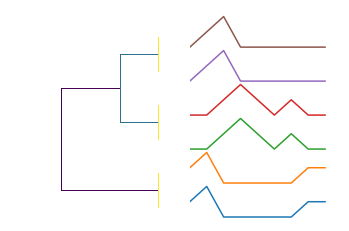

In [ ]:
model3.plot()

In [ ]:
# For models that keep track of the full clustering tree (HierarchicalTree or LinkageTree),
#   the tree can be visualised:

model1.plot("myplot.png")

AttributeError: ignored

In [ ]:
# Custom Hierarchical clustering
model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
cluster_idx = model1.fit(timeseries)
# Keep track of full tree by using the HierarchicalTree wrapper class
model2 = clustering.HierarchicalTree(model1)
cluster_idx = model2.fit(timeseries)
# You can also pass keyword arguments identical to instantiate a Hierarchical object
model2 = clustering.HierarchicalTree(dists_fun=dtw.distance_matrix_fast, dists_options={})
cluster_idx = model2.fit(timeseries)
# SciPy linkage clustering
model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
cluster_idx = model3.fit(timeseries)

NameError: ignored

# tsfresh

* https://tsfresh.readthedocs.io/en/latest/text/list_of_features.html

# tslearn

* https://tslearn.readthedocs.io/en/stable/variablelength.html

In [ ]:
!pip install tslearn

In [ ]:
from tslearn.utils import to_time_series_dataset

X = to_time_series_dataset([[1, 2, 3, 4], [1, 2, 3], [2, 5, 6, 7, 8, 9]])
y = [0, 0, 1]

In [ ]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier

knn = KNeighborsTimeSeriesClassifier(n_neighbors=2)
knn.fit(X, y)

In [ ]:
knn.predict([1,2,3,4])[0]

In [ ]:
knn.predict([1,2,3])

In [ ]:
knn.predict([2, 5, 6, 7, 8, 9])[0]